In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from functions import *

Let $X \sim U[-2,2]$ and 

\begin{equation}
Y_i=a\left\{X_i+2 \exp \left(-16 X_i^2\right)\right\}+\sigma\left(X_i\right) \varepsilon_i
\end{equation}

where $\varepsilon \sim \mathcal{N} \left(0,1\right)$.

The variance function is described by

\begin{equation}
\sigma \left(x \right) = 0.4 \exp \left(-2 x^2\right)+0 \cdot 2
\end{equation}



We estimate the relationship with the Nadaraya-Watson estimator

\begin{equation}
m_{n} \left(x\right) = \frac{
\sum_{i=1}^{n} Y_{i} K \left(
    \frac{x-X_{i} }{h}
    \right)
}{\sum_{i=1}^{n} K \left(
    \frac{x-X_{i} }{h}
    \right)}.
\end{equation}

We assume that the predictor $X$ is missing at random and is observed with the probability of observation
\begin{equation}
\pi \left(y\right) = \frac{1}{1+\exp^{-\left(\beta_{0} +\beta_{1}Y_{i}\right)}}
\end{equation}

that is modelled with the logit function.

If $\pi \left(y \right)$ is known, the Horwitz-Thompson estimator is 
\begin{equation}
m_{n} \left(x\right) = \frac{
\sum_{i=1}^{n} 
\frac{\Omega_{i}Y_{i}}{
\pi \left(Y_{i} \right)
}
 K \left(
    \frac{x-X_{i} }{h}
    \right)
}{\sum_{i=1}^{n} 
\frac{\Omega_{i}}{
\pi \left(Y_{i} \right)
}
K \left(
    \frac{x-X_{i} }{h}
    \right)},
\end{equation}

If  $\pi \left(y \right)$ is unknown, we estimate it with 

In [2]:
#Setting 
#Hyperparameter set-up

n = 200
h=0.1
a=0.5

#Data generation 
X = np.random.uniform(-2,2,n)
X.sort()

y = fan(X,n,a)

pi_hat = [pi_hat(h,z,y,pi(y,1,1),n) for z in np.linspace(-1, 1, n)]

(-1.5, 1.5)

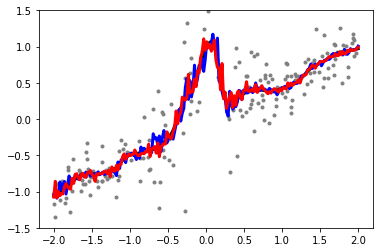

In [3]:
fig, ax = plt.subplots(1, 1)
ax.plot(X, y, 'o', color='grey',markersize=3)
#NW
ax.plot(np.linspace(-2, 2, n),[nw(h,t,X,y) for t in np.linspace(-2, 2, n)],color= 'black', lw=3)
#HT NW
ax.plot(np.linspace(-2, 2, n),[nw_mis(h,t,X,y,pi(y,1,1),n) for t in np.linspace(-2, 2, n)],'-g',color= 'blue', lw=3)
#
ax.plot(np.linspace(-2, 2, n),[nw_mis(h,t,X,y,pi_hat,n) for t in np.linspace(-2, 2, n)],'-g',color= 'red', lw=3)
ax.set_ylim(-1.5,1.5)

In [4]:
#We need to simulate MAR missing values in the predictor 
p = pi(y,b0=1,b1=1)
omega = bernoulli.rvs(p, size=n)
y_hat = [nw_mis(h,t,X,y,p,n ) for t in np.linspace(0, 1, n)]
np.mean((y-y_hat)**2)

0.9274646367673103

In [5]:
H = np.linspace(0.1, 0.1, 1)

In [6]:
H

array([0.1])

In [ ]:
mse_nw = []
mse_hw = []
mse_hw_est = []
mse_cc = []

sim = 400

for i in range(sim):
    X = np.random.uniform(0,1,n)
    y = f(X,n)
    # H-sample 
    y_hat_nw = [nw(h,t,X,y) for t in np.linspace(0, 1, n)]
    mse_nw.append(np.mean((y-y_hat_nw)**2))
    # MAR KNOWN 
    p = pi(y,b0=1,b1=1)
    omega = bernoulli.rvs(p, size=n)
     ## CC
    y_hat_cc = [nw_cc(h,t,X,y,p,n) for t in np.linspace(0, 1, n)]
    mse_cc.append(np.mean((y-y_hat_cc)**2))
    ## HW
    y_hat_hw = [nw_mis(h,t,X,y,p,n) for t in np.linspace(0, 1, n)]
    mse_hw.append(np.mean((y-y_hat_hw)**2))
    # MAR estimated
    y_hat_hw_est = [nw_mis(h,t,X,y,pi_hat,n) for t in np.linspace(0, 1, n)]
    mse_hw_est.append(np.mean((y-y_hat_hw_est)**2))

    

In [ ]:
# Pandas dataframe
data = pd.DataFrame({'mse_nw': mse_nw, 'mse_cc':mse_cc,'mse_hw': mse_hw,'mse_hw_est': mse_hw_est})

# Plot the dataframe
ax = data[['mse_nw', 'mse_cc','mse_hw','mse_hw_est']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()